***Human Pose Classification***

***Load Data***

In [2]:
from datasets import load_dataset

dataset = load_dataset("Bingsu/Human_Action_Recognition", split='train')

Generating train split:   0%|          | 0/12600 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5400 [00:00<?, ? examples/s]

In [3]:
dataset = dataset.shuffle(seed=42).train_test_split(test_size=0.2)

***Data Preprocessing***

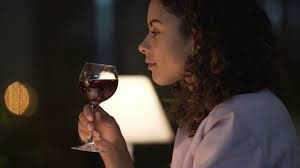

In [6]:
dataset['train'][0]['image']

In [10]:
labels = dataset['train'].features['labels'].names

label2id = {l: i for i, l in enumerate(labels)}
id2label = {i: l for i, l in enumerate(labels)}

In [11]:
from transformers import AutoImageProcessor # -> like a tokenizer for images

model_ckpt = 'google/vit-base-patch16-224-in21k'



In [12]:
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor

image_processor = AutoImageProcessor.from_pretrained(model_ckpt, use_fast=True)
normalise = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)

size = (image_processor.size['shortest_edge'] if "shortest_edge" in image_processor.size else (image_processor.size['height'], image_processor.size['width']))
print(size)

_transform = Compose([
    RandomResizedCrop(size),
    ToTensor(),
    normalise
])

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

(224, 224)


In [13]:
def transforms(batch):
    batch['pixel_values'] = [_transform(image.convert("RGB")) for image in batch['image']]
    del batch['image']
    return batch

In [14]:
dataset = dataset.with_transform(transforms)